In [1]:
plt = plotter()
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
import jax
import jax.numpy as np
import jax.nn as nn
import optax
import haiku as hk

In [3]:
import rl_simple as rls
import rl_tools as rlt

In [4]:
θp, θv = rls.solve_iterate(R=1000, Δp=0.1, Δv=0.1)
θp, θv

(DeviceArray([ 1.0544201 ,  0.01098631, -0.0125548 ,  0.00397515], dtype=float32),
 DeviceArray([-0.93251836,  1.7991424 , -1.2219907 ,  0.23386107], dtype=float32))

In [5]:
pgrad = rls.grad_policy_obj(θp, θv)
vgrad = rls.grad_value_obj(θp, θv)
pgrad, vgrad

(DeviceArray([-5.2011255e-05,  7.5457360e-06,  2.9722751e-05,
              -1.5812457e-05], dtype=float32),
 DeviceArray([ 1.95069239e-04,  9.21107203e-05, -1.07987216e-04,
               3.20196777e-05], dtype=float32))

In [6]:
poly = rls.pol_vec(rls.xgrid, θp)
value = rls.val_vec(rls.xgrid, θv)
valuep = rls.eval_policy_vec(rls.xgrid, θp, θv)

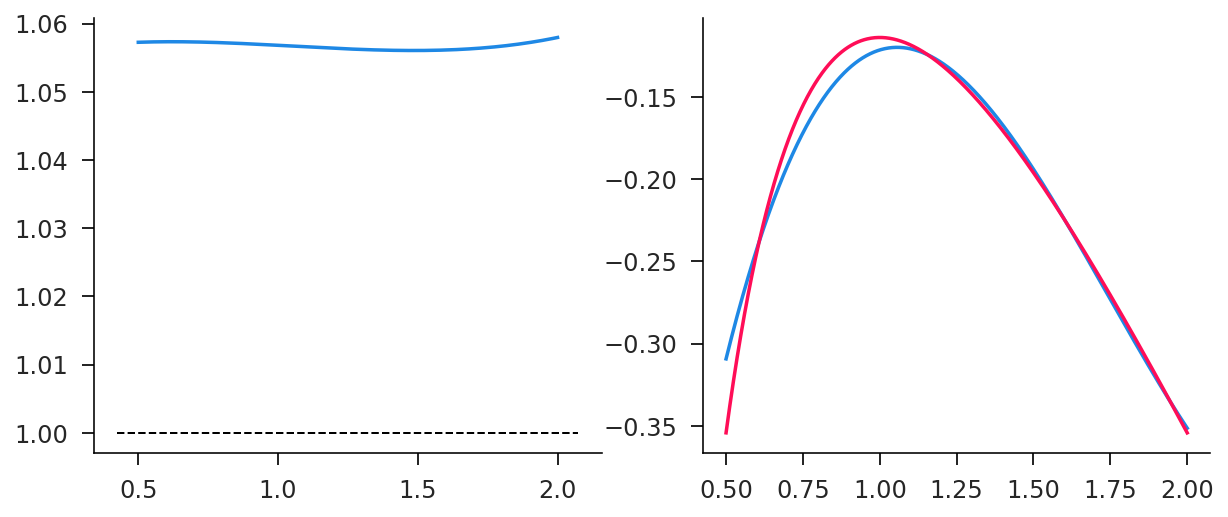

In [8]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 4))
ax0.plot(rls.xgrid, poly)
ax1.plot(rls.xgrid, value, rls.xgrid, valuep)
ax0.hlines(1, *ax0.get_xlim(), color='k', linestyle='--', linewidth=1)
ax0.scatter(0, 0, color='k', zorder=10);

In [9]:
vcheb = jax.vmap(rlt.cheb, in_axes=(0, None))

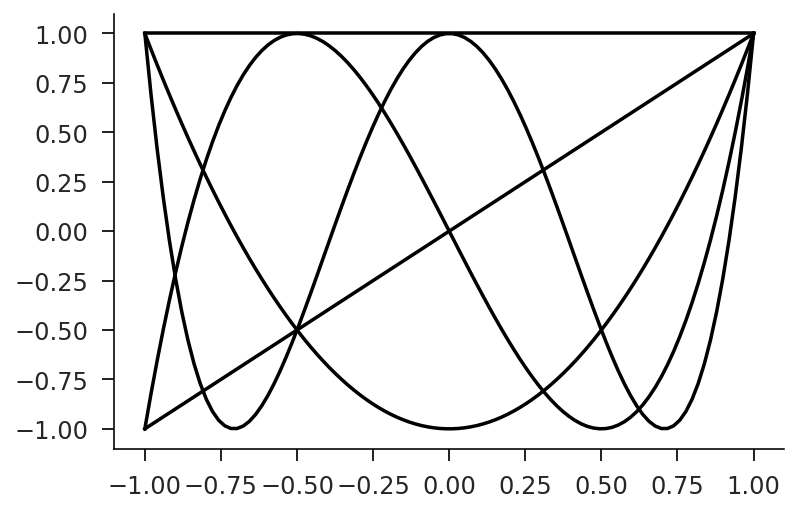

In [10]:
fig, ax = plt.subplots()
x = np.linspace(-1, 1, 100)
for d in range(5):
    y = vcheb(x, d)
    ax.plot(x, y, color='k')

In [11]:
M = 6
cheb = rlt.chebyshev(M, 0, 1)
dcheb = jax.grad(cheb)
dcheb(0.3, np.ones(M))

DeviceArray(0.24000072, dtype=float32, weak_type=True)

In [31]:
N = 100

def pol(xgrid):
    mlp = hk.Sequential([
        hk.Linear(N), nn.relu,
        hk.Linear(N), nn.relu,
    ])
    logits = mlp(xgrid)
    probs = nn.softmax(logits)
    return probs
pol_t = hk.without_apply_rng(hk.transform(pol))

rng = jax.random.PRNGKey(42)
xgrid = np.linspace(-2, 2, N)
params = pol_t.init(rng, xgrid)

In [34]:
pol_t.apply(params, xgrid)

DeviceArray([0.00767951, 0.01567357, 0.0098675 , 0.01585479, 0.00770415,
             0.00767951, 0.00767951, 0.00767951, 0.00767951, 0.01998945,
             0.0132153 , 0.00767951, 0.0086245 , 0.00822999, 0.00767951,
             0.00767951, 0.00767951, 0.00767951, 0.00767951, 0.02109525,
             0.00800439, 0.00824132, 0.01057707, 0.00767951, 0.01491835,
             0.00767951, 0.00767951, 0.01446768, 0.00957488, 0.00767951,
             0.00767951, 0.00767951, 0.01352519, 0.00767951, 0.00767951,
             0.0091503 , 0.00767951, 0.00767951, 0.01094471, 0.00816803,
             0.00767951, 0.00767951, 0.00767951, 0.00767951, 0.00767951,
             0.01685366, 0.00767951, 0.00767951, 0.00767951, 0.00767951,
             0.0137142 , 0.00767951, 0.00767951, 0.00767951, 0.0137631 ,
             0.00767951, 0.01100671, 0.02118836, 0.00767951, 0.02151317,
             0.00767951, 0.00767951, 0.00767951, 0.00767951, 0.00767951,
             0.00767951, 0.00767951, 0.00767951, 0.